# Introdução

**Autor:** Állan Christoffer Pereira Silva

**Instituição:** Universidade Federal de Goiás

**Curso:** Bacharelado em Inteligência Artificial

**Disciplina:** Residência em Inteligência Artificial

<img src="https://hupdata.com/wp-content/uploads/2020/03/17.03.png" width="1000" height="400"/>

O caso prático a seguir é parte do Trabalho de Conclusão de Curso do autor e irá demonstrar uma aplicação de Machine Learning em **análise de risco de crédito**. A análise de crédito é uma atividade presente em diversos negócios como:

* Instituições Financeiras: como Itaú, Banco do Brasil e Sicoob.

* Empresas de Cartão de Crédito: como Visa, Mastercard e American Express.

* Agências de Crédito: como Serasa Experian e Boa Vista SCPC.

* Empresas de Locação: como Localiza, Movida e Unidas.

* Fintechs de Empréstimos Online: como Nubank, Creditas e Geru.

Após a construção de todo o fluxo de processamento dos dados e treinamento do modelo preditivo, a aplicação será disponibilizada para usuários inserirem seus dados através de uma interface e receberem o resultado da aprovação ou rejeição do crédito. A disponibilização dessa solução será feita utilizando os princípios do **Machine Learning Operations (MLOps)**, um conjunto de práticas que visam à implantação e gestão eficientes de aplicações que envolvem Machine Learning.

# Metodologia de desenvolvimento

O objetivo principal desta aplicação é desenvolver um sistema de apoio à tomada de decisão a partir de um **modelo de Machine Learning** capaz classificar os clientes que podem ter acesso ao empréstimo e quais não podem ter.

Antes de mais nada, será apresentada a metodologia de desenvolvimento utilizada na construção desta ferramenta de análise de dados e Machine Learning. O **CRISP-DM** é um modelo estruturado que orienta a abordagem sistemática para a resolução de problemas complexos por meio de dados, fornecendo um processo flexível e iterativo que abrange desde a compreensão inicial do contexto até a tomada de decisões baseada em insights obtidos.

<img src="https://miro.medium.com/v2/resize:fit:988/0*tA5OjppLK627FfFo" width="400" height="400"/>

As etapas do CRISP_DM são:

1. **Compreensão do negócio:** compreender as necessidades do negócio e definir metas claras para a construção do sistema de apoio à tomada de decisão.

2. **Compreensão dos dados:** coletar e explorar os dados disponíveis, compreender sua qualidade e estrutura.

3. **Preparação dos dados:** limpar, transformar e selecionar os dados relevantes para análise.

4. **Modelagem:** aplicar técnicas de análise de dados para identificar padrões e construir modelos preditivos (prever situações futuras) ou descritivos (sugerir o que pode ser feito).

5. **Avaliação:** avaliar a qualidade e o desempenho dos modelos desenvolvidos, usando métricas adequadas.

6. **Desenvolvimento:** integrar os resultados do sistema de apoio à tomada de decisão no ambiente de negócios e tomar medidas com base nas conclusões obtidas.


# Arquitetura da solução

A aplicação em questão segue um esquema baseado na arquitetura Delta, idealizada pela empresa [Databricks](https://www.databricks.com/blog/2020/11/20/delta-vs-lambda-why-simplicity-trumps-complexity-for-data-pipelines.html). 

<img src="https://www.databricks.com/wp-content/uploads/2020/11/blog-delta-auto-2.png" width="900" height="250"/>

Assim, a arquitetura proposta segue os princípios do MLOps ao mesmo tempo que utiliza os componentes de armazenamento da arquitetura Delta (camadas bronze, silver e gold).

Neste notebook serão mostrados somente os passos de análise exploratória, preparação dos dados, treinamento e avaliação dos modelo preditivo. O deploy da aplicação em si (API do serviço preditivo + interface de usuário) será realizada em um momento posterior utilizando os serviços disponibilizados pela plataforma Google Cloud.

# Compreensão do Negócio

O problema de negócio envolvendo análise de crédito e empréstimo é garantir a concessão de empréstimos de forma segura e eficiente, minimizando os riscos de inadimplência e prejuízos para a instituição financeira. O objetivo é tomar decisões precisas e embasadas ao avaliar a capacidade de pagamento e a confiabilidade do solicitante.

Os principais stakeholders envolvidos nesse problema são:

* **Solicitante**: A pessoa que solicita o empréstimo é fundamental nesse contexto. Seu perfil financeiro, histórico de crédito, renda e estabilidade empregatícia são fatores determinantes para a análise de crédito.

* **Instituição financeira**: Representada por bancos, cooperativas de crédito ou outras organizações financeiras, a instituição é responsável por avaliar o risco associado ao empréstimo. Seu objetivo é proteger seus interesses financeiros e garantir a sustentabilidade do negócio.

* **Analistas de crédito**: São profissionais responsáveis por analisar os dados do solicitante, verificar a veracidade das informações fornecidas e realizar a avaliação do risco de crédito. Eles utilizam ferramentas e modelos para tomar decisões fundamentadas sobre a aprovação ou recusa do empréstimo.

* **Reguladores e órgãos governamentais**: Estes stakeholders estabelecem diretrizes e regulamentações para as instituições financeiras, visando proteger os consumidores e garantir a estabilidade do sistema financeiro. Suas políticas e regras podem impactar os procedimentos de análise de crédito e empréstimo.

* **Investidores e acionistas**: Em instituições financeiras com fins lucrativos, os investidores e acionistas têm interesse na rentabilidade e na redução de riscos associados aos empréstimos concedidos. Seus interesses estão alinhados com a necessidade de uma análise de crédito adequada.

O desafio é encontrar um equilíbrio entre atender às necessidades dos solicitantes e mitigar os riscos para as instituições financeiras, garantindo que a concessão de empréstimos seja justa, transparente e sustentável. A análise de crédito desempenha um papel fundamental nesse processo, permitindo a tomada de decisões informadas e responsáveis.

# Bibliotecas

Abaixo estão as importações de todas as bibliotecas necessárias para o desenvolvimento do projeto.

In [2]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
from sklearn.model_selection import train_test_split
from pycaret.classification import *

# Garante a replicabilidade dos experimentos
SEED = 42

# Nome para registro do experimento
EXPERIMENT_NAME = 'dataset completo'

# Compreensão dos Dados

A base de dados utilizada neste projeto foi originalmente traduzida de uma base pública disponível no [Kaggle](https://www.kaggle.com/datasets/laotse/credit-risk-dataset).

In [3]:
# Download da base de dados
df = pd.read_csv('../data/bronze/raw.csv')
df.head()

,Idade,Renda anual,Tipo residência,Tempo no emprego,Intenção de empréstimo,Valor do empréstimo,Taxa de juros,Status do empréstimo,Histórico não pagamentos,Tempo histórico de crédito
0,22,280840.0,ALUGUEL,123.0,PESSOAL,166600.0,16.02,1,S,3
1,21,45696.0,PRÓPRIO,5.0,EDUCAÇÃO,4760.0,11.14,0,N,2
2,25,45696.0,HIPOTECA,1.0,MÉDICO,26180.0,12.87,1,N,3
3,23,311780.0,ALUGUEL,4.0,MÉDICO,166600.0,15.23,1,N,2
4,24,258944.0,ALUGUEL,8.0,MÉDICO,166600.0,14.27,1,S,4


A seguir está uma breve descrição das informações contidas nessa base de dados:

| Nome do atributo      | Descrição               |
|-----------------------|-------------------------|
| Idade                 | Idade do solicitante    |
| Renda anual           | Renda anual do solicitante (reais) |
| Tipo residência | Tipo da residência do solicitante (ALUGUEL, PRÓPRIA, HIPOTECA, OUTRO)            |
| Tempo no emprego     | Tempo que o solicitante está no emprego atual (anos) |
| Intenção de empréstimo          | A intenção do solicitante com relação ao empréstimo (PESSOAL, EDUCAÇÃO, MÉDICO, INVESTIMENTO, REFORMA, PAGAMENTO DE DIVIDAS)  |
| Valor do empréstimo             | Valor do empréstimo solicitado (reais)     |
| Taxa de juros        | Taxa de juros para o empréstimo (percentual)          |
| Status do empréstimo           | Negado (0) ou Aprovado (1)    |
| Histórico não pagamentos | Se existe histórico de não pagamentos do solicitantes (S ou N)   |
| Tempo histórico de crédito (anos) | Quanto tempo o solicitante possui de histórico de crédito |

# Análise Exploratória 📊

Durante esta etapa, os dados são analisados de forma preliminar, ou seja, explore os atributos, analise como os dados estão dispostos no conjunto, procure por informações que possam te ajudar nos próximos passos. Lembre-se: aqui os gráficos são seus maiores aliados, use eles a seu favor.

A fase de análise exploratória representa o momento em que os dados serão analisados antes de qualquer processamento. Nela, os registros e os atributos da base de dados são explorados, a forma como estão dispostos no conjunto, além da busca por informações que possam ser úteis nos próximos passos.

In [4]:
# Dimensão da base de dados
df.shape

(32581, 10)

In [5]:
# Tipos dos atributos
df.dtypes

Idade                           int64
Renda anual                   float64
Tipo residência                object
Tempo no emprego              float64
Intenção de empréstimo         object
Valor do empréstimo           float64
Taxa de juros                 float64
Status do empréstimo            int64
Histórico não pagamentos       object
Tempo histórico de crédito      int64
dtype: object

In [6]:
# Separação dos atributos por tipo
categ_features = df.select_dtypes(include=['object']).columns.tolist()
print(f'Atributos categóricos = {categ_features}')
num_features = df.select_dtypes(exclude=['object']).columns.tolist()
print(f'Atributos numéricos = {num_features}')

Atributos categóricos = ['Tipo residência', 'Intenção de empréstimo', 'Histórico não pagamentos']
Atributos numéricos = ['Idade', 'Renda anual', 'Tempo no emprego', 'Valor do empréstimo', 'Taxa de juros', 'Status do empréstimo', 'Tempo histórico de crédito']


In [7]:
# Valores únicos dos atributos categóricos
for feature in categ_features:
  print(f'{feature} = {df[feature].unique()}')

Tipo residência = ['ALUGUEL' 'PRÓPRIO' 'HIPOTECA' 'OUTRO']
Intenção de empréstimo = ['PESSOAL' 'EDUCAÇÃO' 'MÉDICO' 'INVESTIMENTO' 'REFORMA'
 'PAGAMENTO DE DIVIDAS']
Histórico não pagamentos = ['S' 'N']


In [8]:
# Estatística descritiva dos atributos numéricos
df.describe().round(2)

,Idade,Renda anual,Tempo no emprego,Valor do empréstimo,Taxa de juros,Status do empréstimo,Tempo histórico de crédito
count,32581.00,32581.00,31686.00,32581.00,29465.00,32581.00,32581.00
mean,27.73,314516.28,4.79,45645.41,11.01,0.22,5.80
std,6.35,295039.65,4.14,30093.13,3.24,0.41,4.06
min,20.00,19040.00,0.00,2380.00,5.42,0.00,2.00
25%,23.00,183260.00,2.00,23800.00,7.90,0.00,3.00
50%,26.00,261800.00,4.00,38080.00,10.99,0.00,4.00
75%,30.00,376992.00,7.00,58072.00,13.47,0.00,8.00
max,144.00,28560000.00,123.00,166600.00,23.22,1.00,30.00


In [9]:
# Detecção de dados faltantes
df.isnull().sum()

Idade                            0
Renda anual                      0
Tipo residência                  0
Tempo no emprego               895
Intenção de empréstimo           0
Valor do empréstimo              0
Taxa de juros                 3116
Status do empréstimo             0
Histórico não pagamentos         0
Tempo histórico de crédito       0
dtype: int64

In [10]:
# Detecção de valores duplicados
df[df.duplicated()]

,Idade,Renda anual,Tipo residência,Tempo no emprego,Intenção de empréstimo,Valor do empréstimo,Taxa de juros,Status do empréstimo,Histórico não pagamentos,Tempo histórico de crédito
15975,23,199920.00,ALUGUEL,5.0,INVESTIMENTO,28560.0,9.99,0,N,4
15989,23,428400.00,HIPOTECA,7.0,EDUCAÇÃO,38080.0,10.36,0,N,3
15995,24,228480.00,HIPOTECA,4.0,MÉDICO,19040.0,5.42,0,N,4
16025,24,47600.00,ALUGUEL,8.0,PESSOAL,14280.0,7.90,1,N,3
16028,23,476000.00,HIPOTECA,7.0,EDUCAÇÃO,71400.0,7.88,0,N,4
...,...,...,...,...,...,...,...,...,...,...
32010,42,190380.96,HIPOTECA,2.0,REFORMA,11900.0,5.42,0,N,12
32047,36,1190000.00,ALUGUEL,2.0,PAGAMENTO DE DIVIDAS,95200.0,7.88,0,N,17
32172,49,571200.00,HIPOTECA,12.0,MÉDICO,57120.0,10.99,0,N,12
32259,39,190400.00,PRÓPRIO,4.0,INVESTIMENTO,4760.0,10.37,0,N,16


                                             |          | [  0%]   00:00 -> (? left)


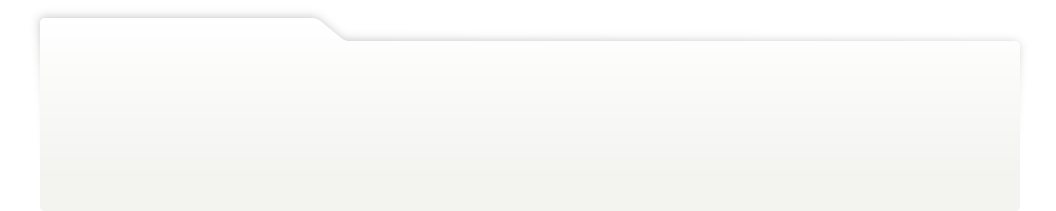
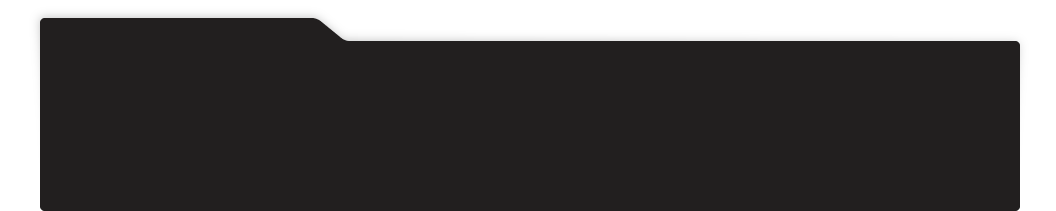
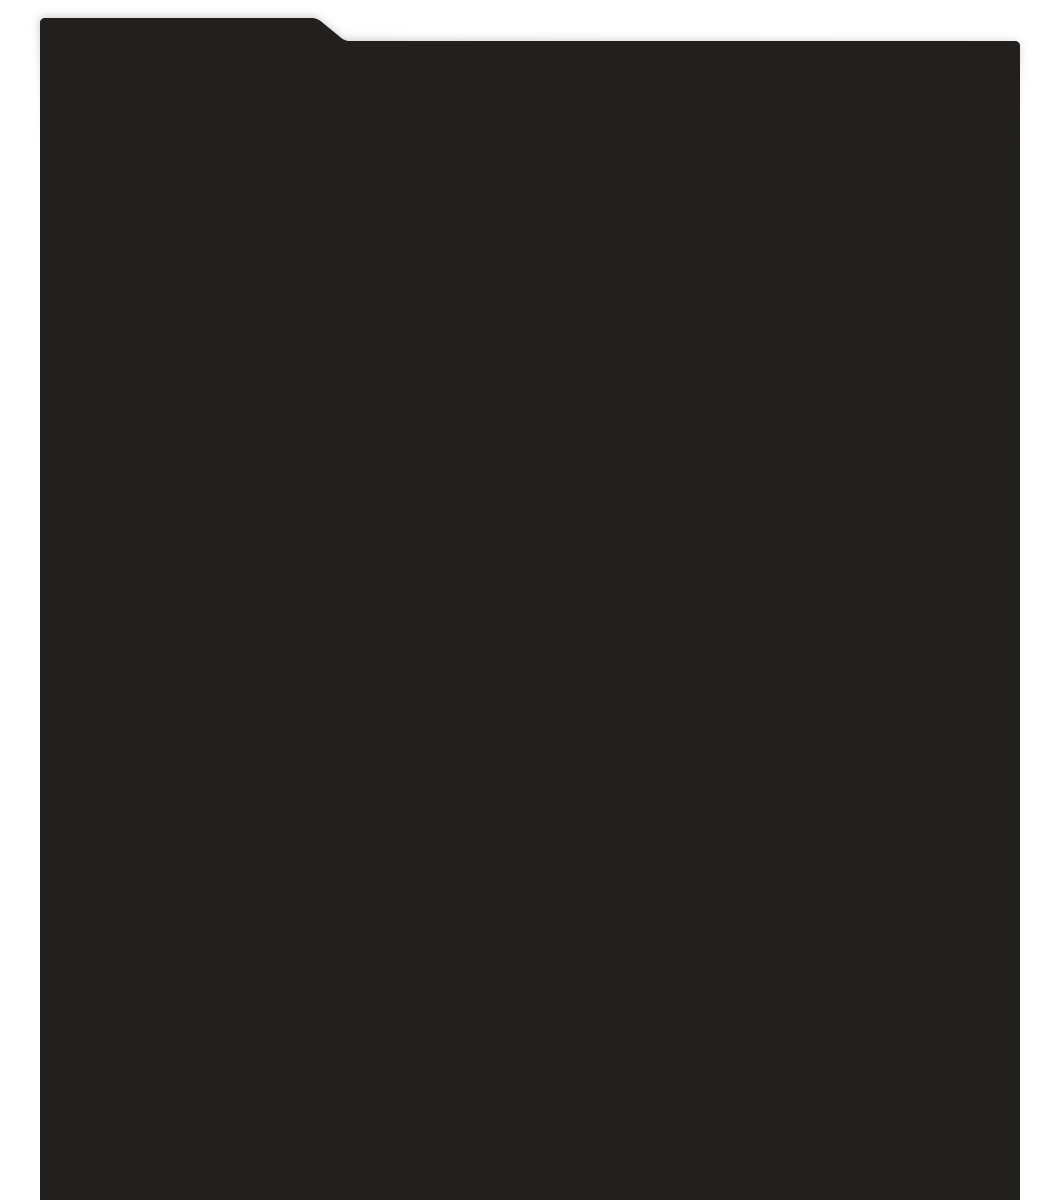
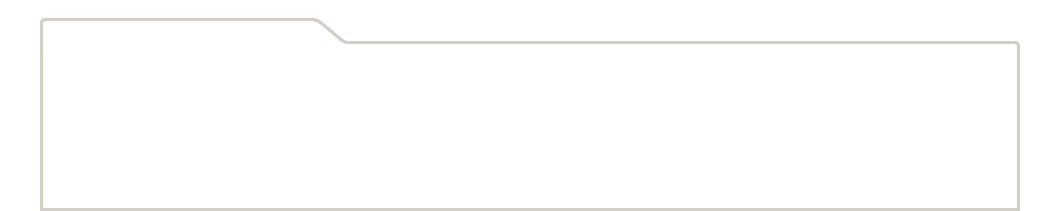
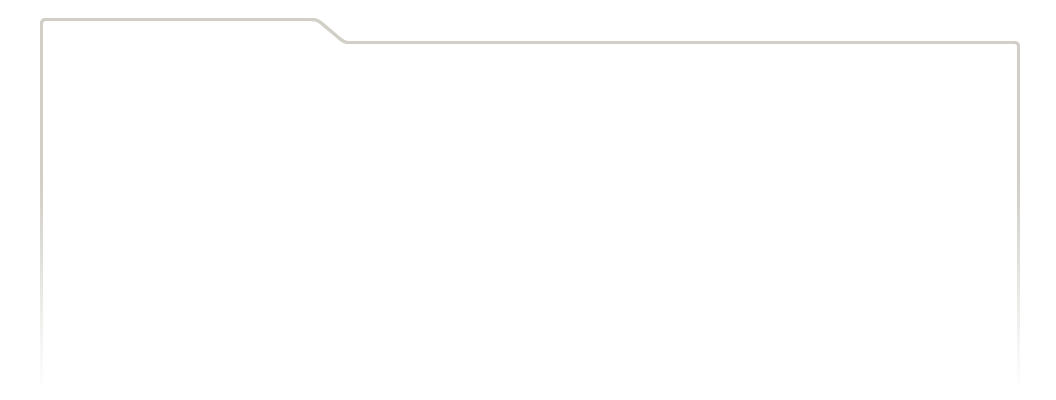
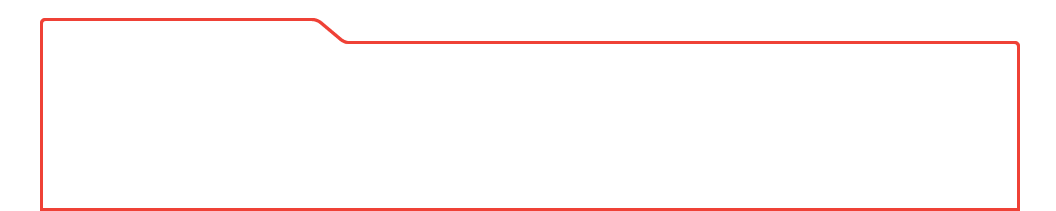
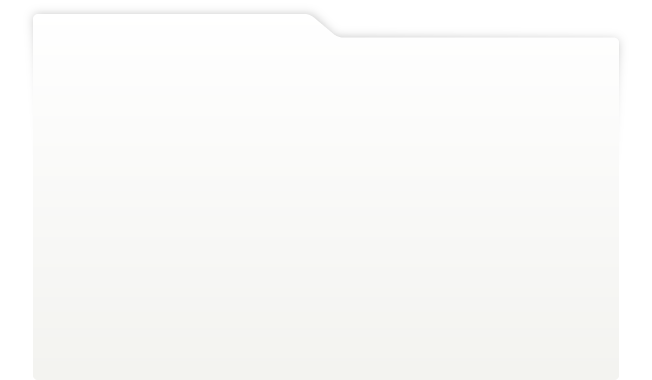
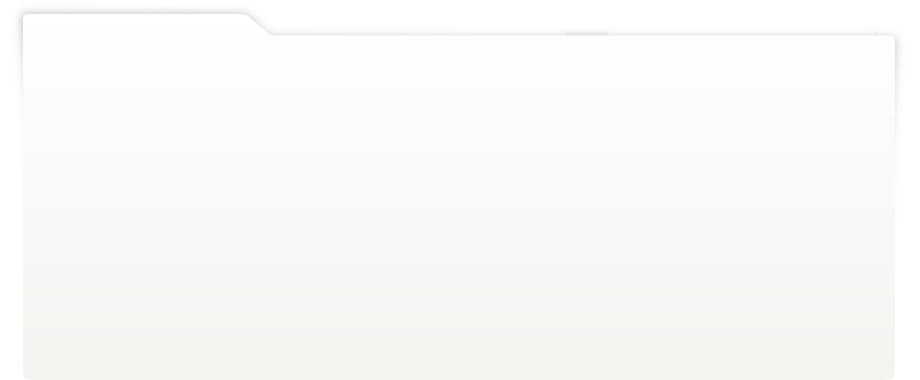
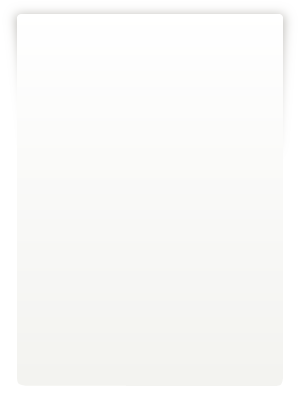
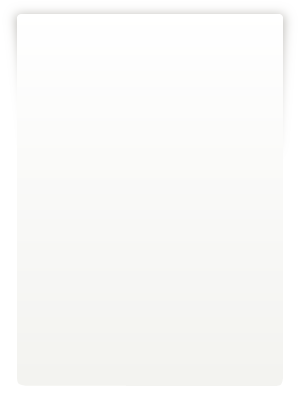
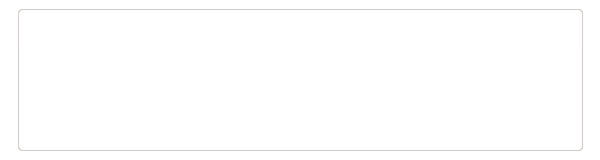
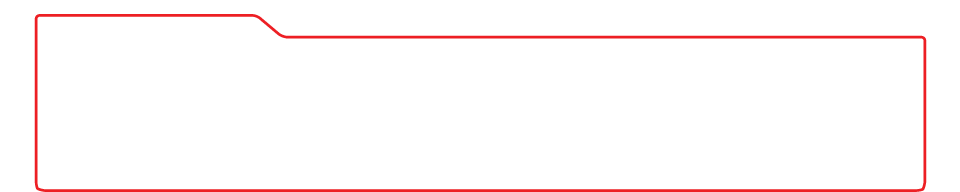
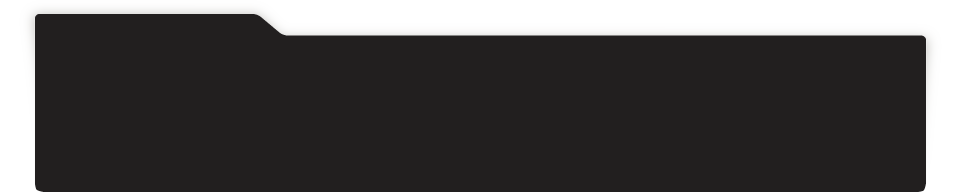
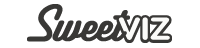
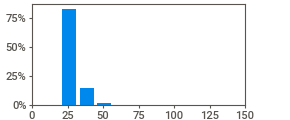
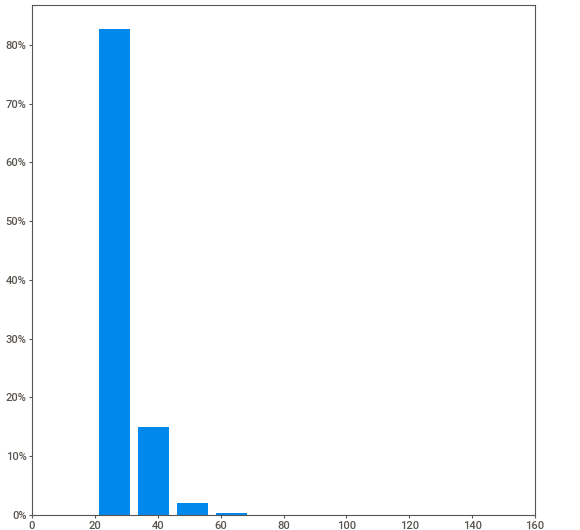
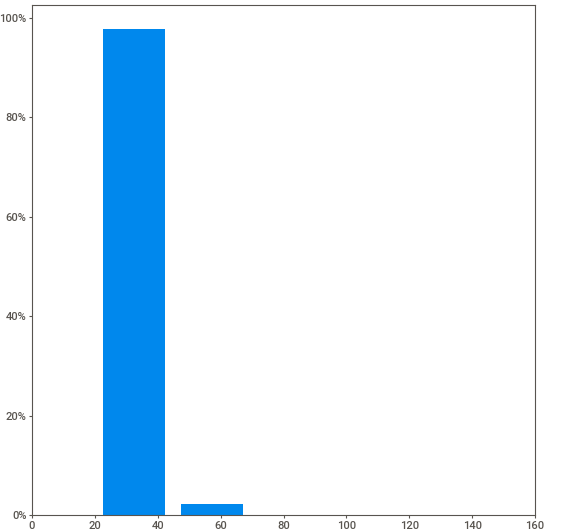
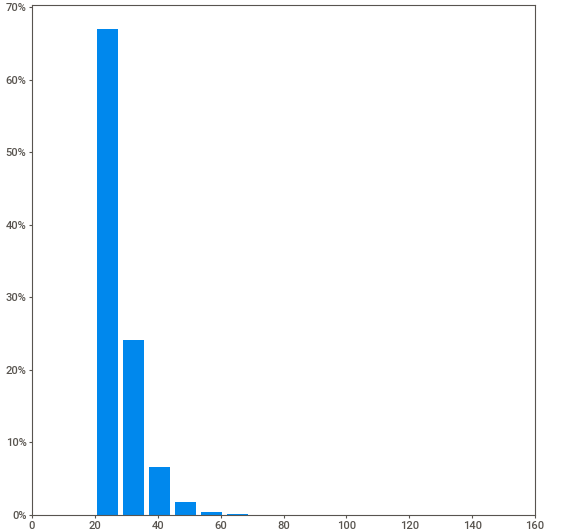
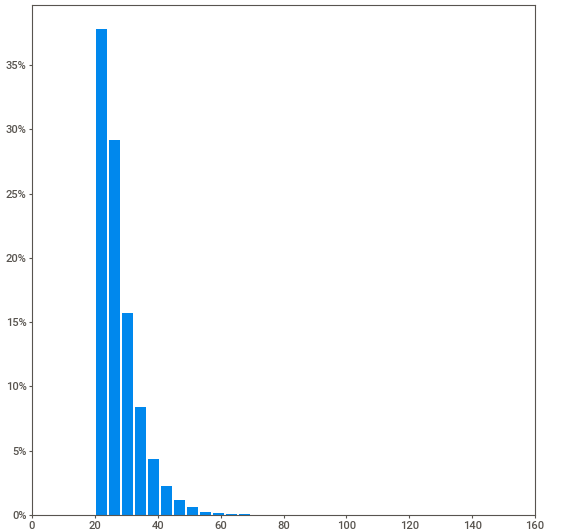
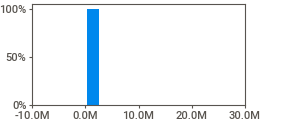
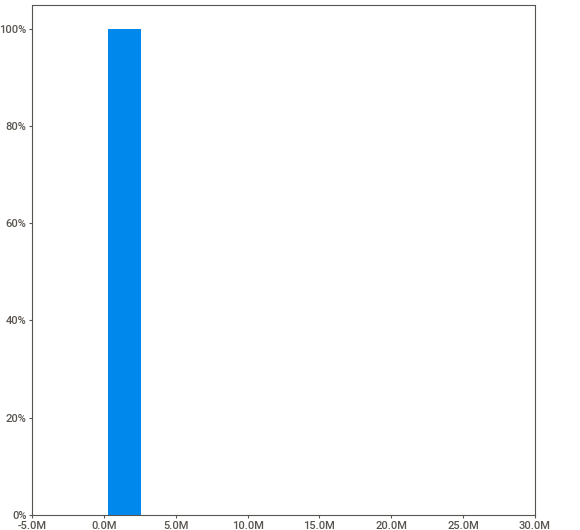
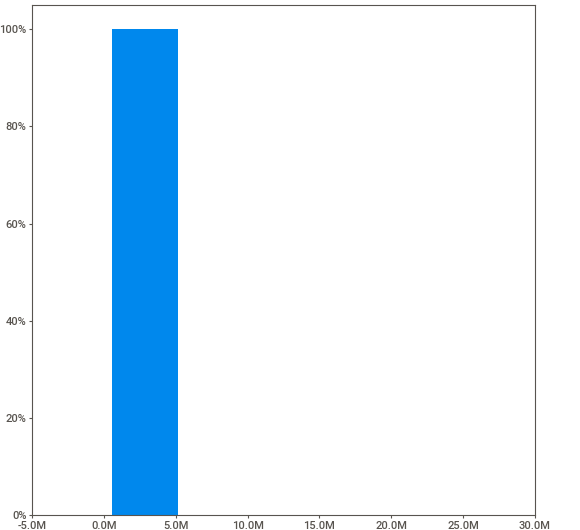
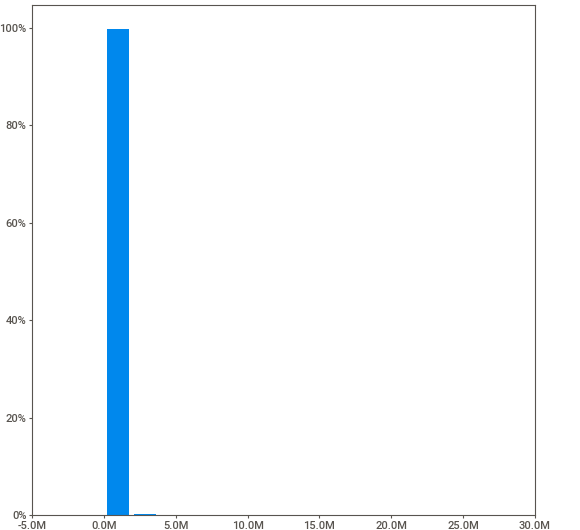
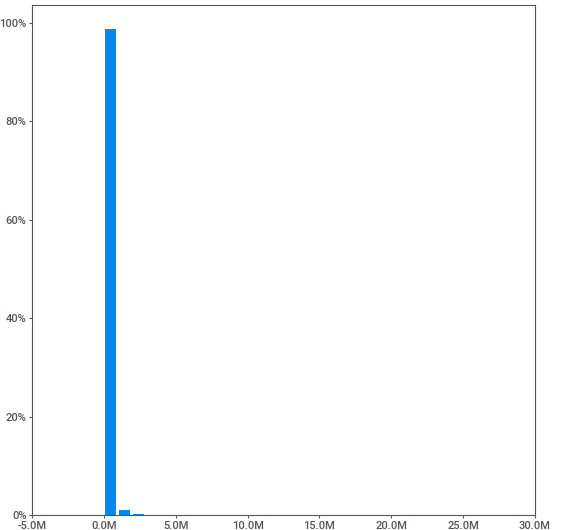
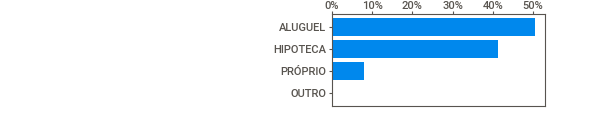
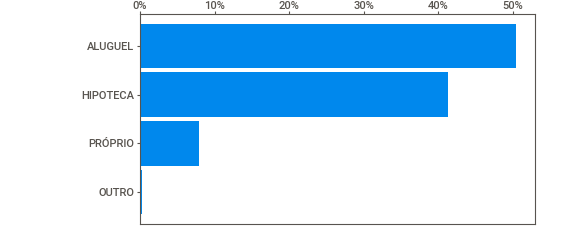
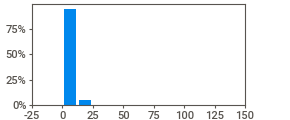
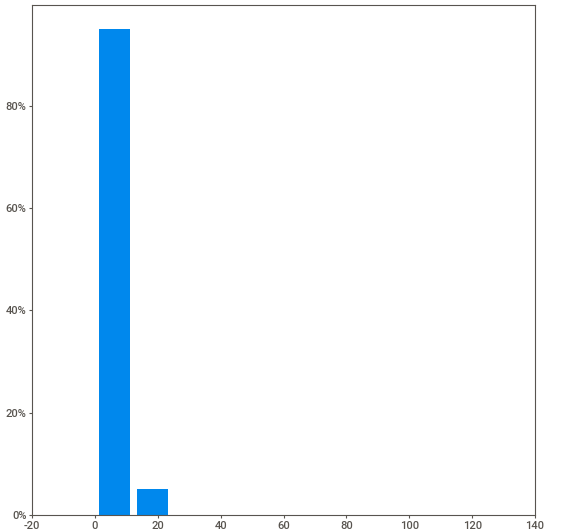
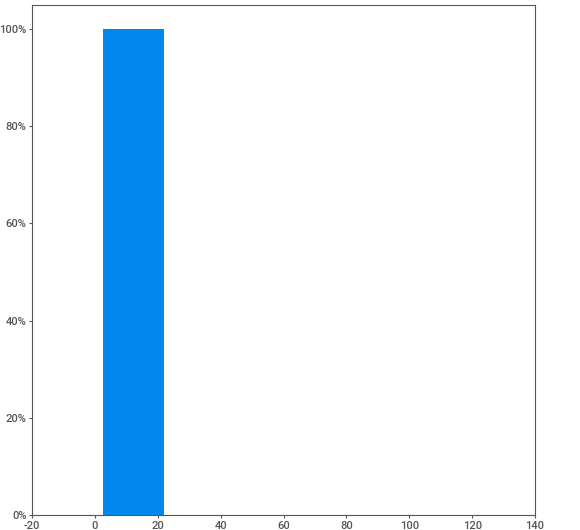
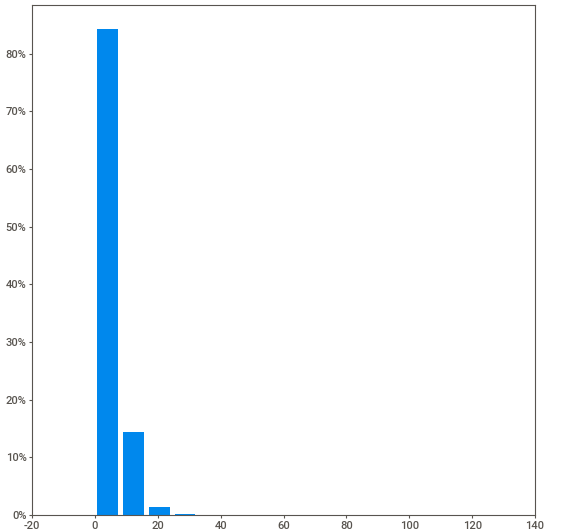
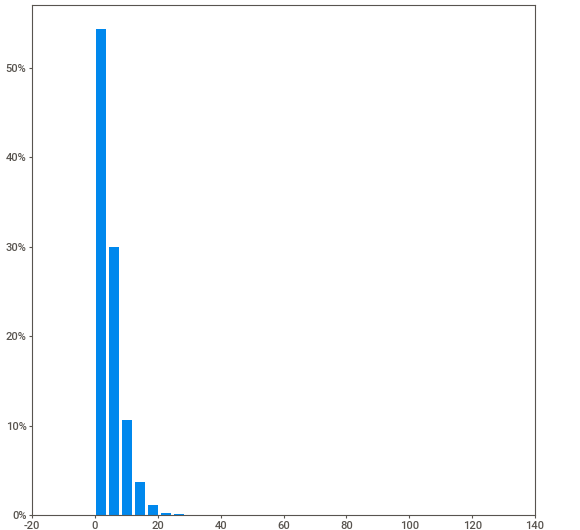
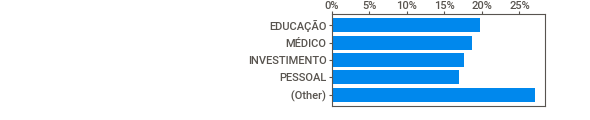
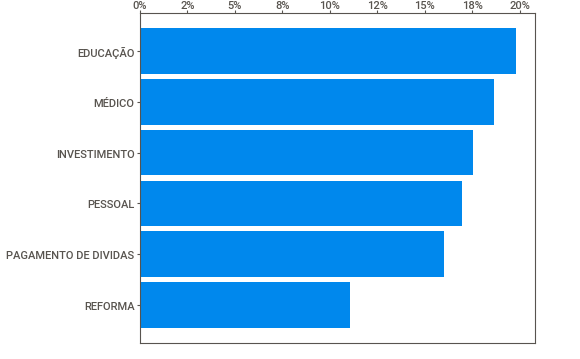
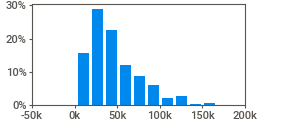
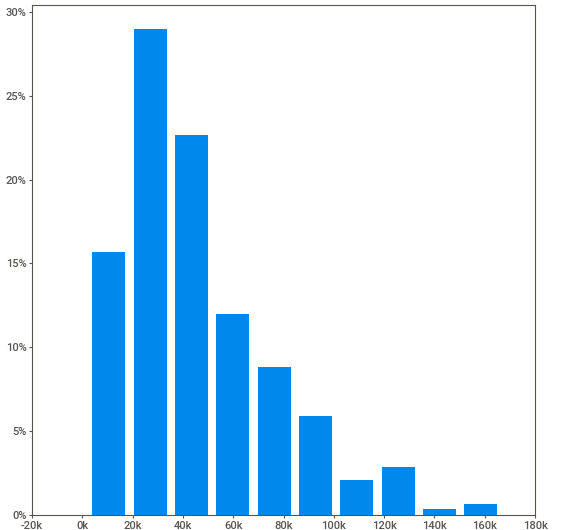
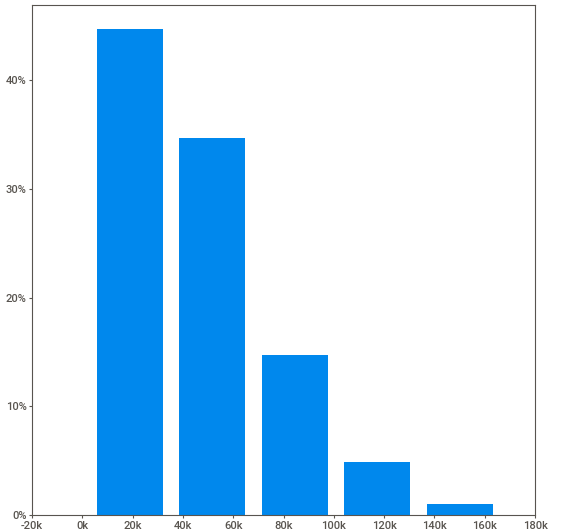
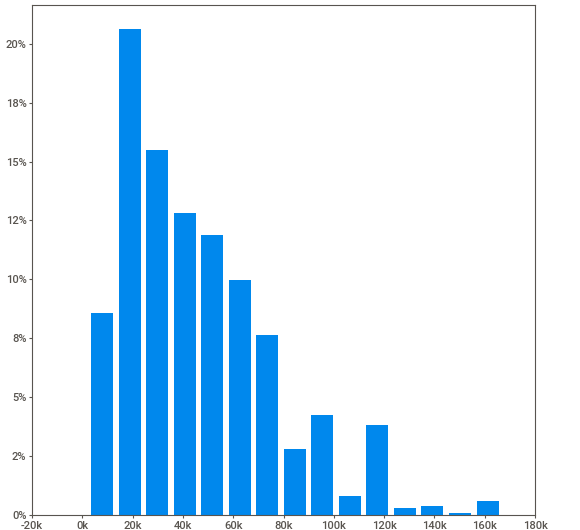
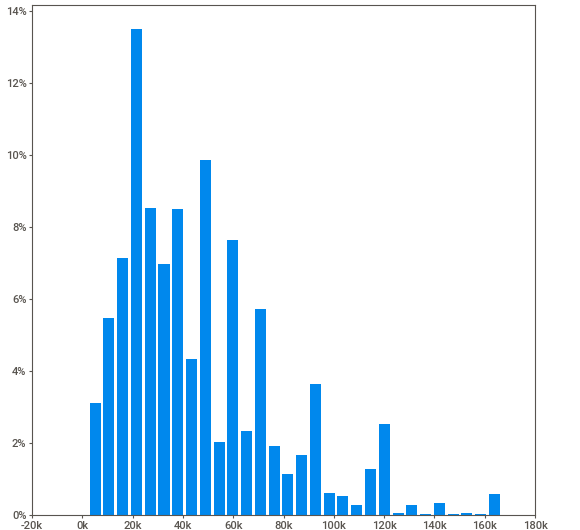
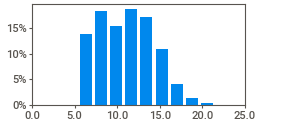
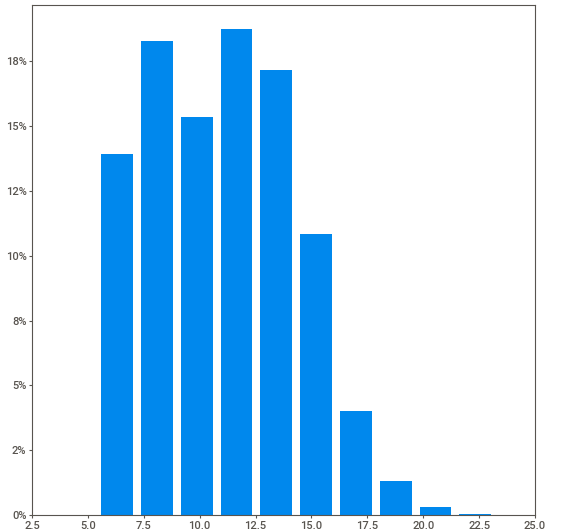
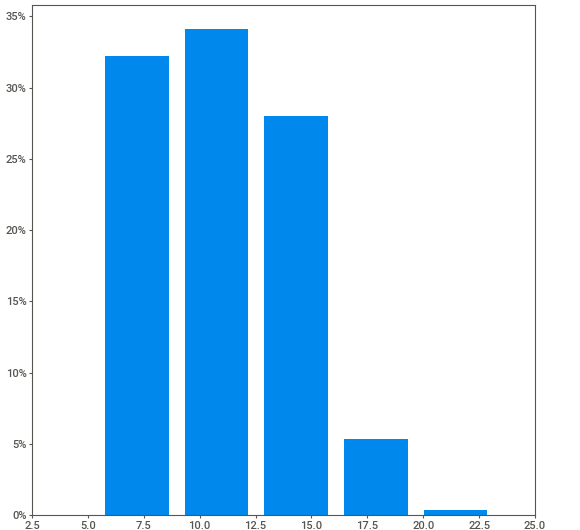
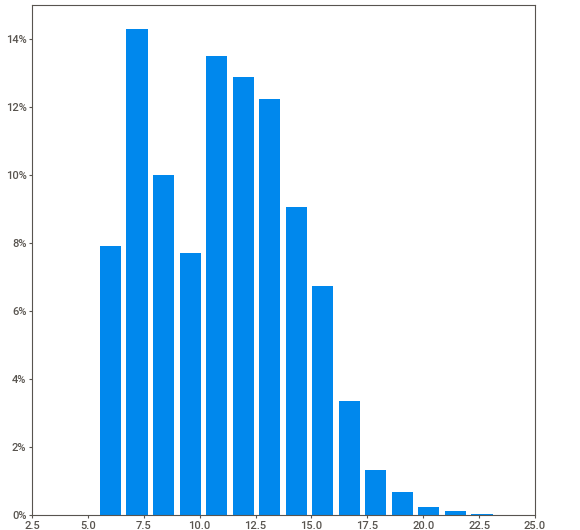
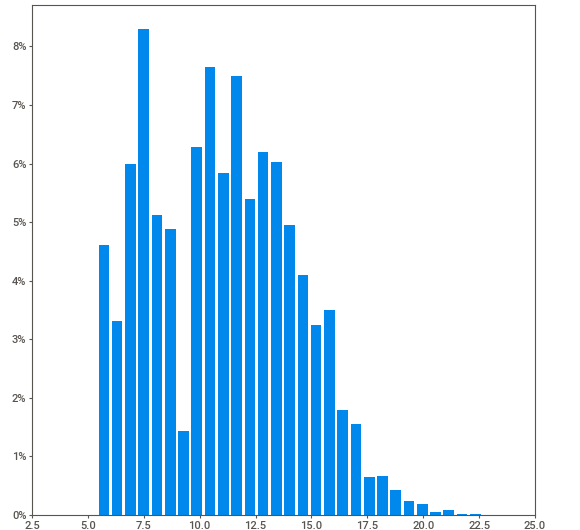
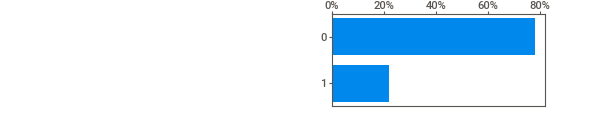
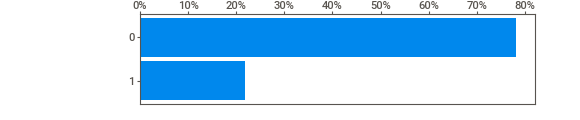
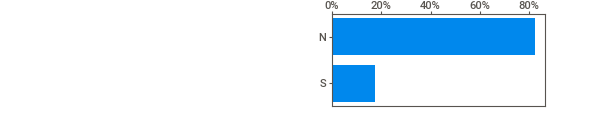
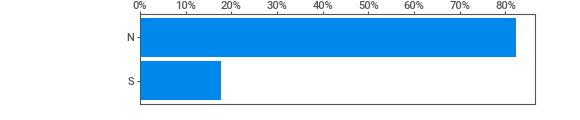
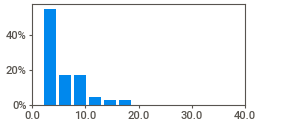
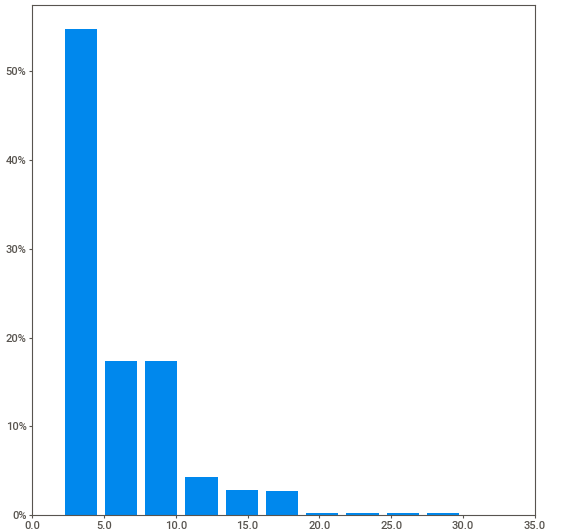
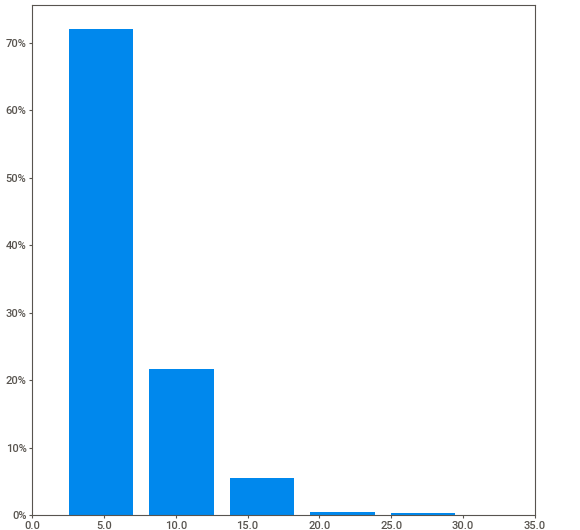
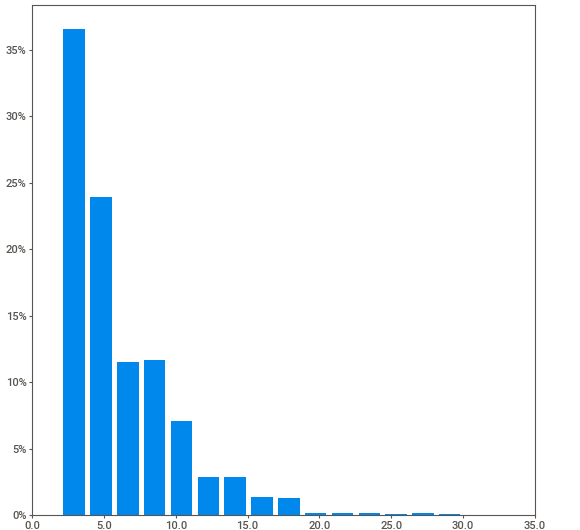
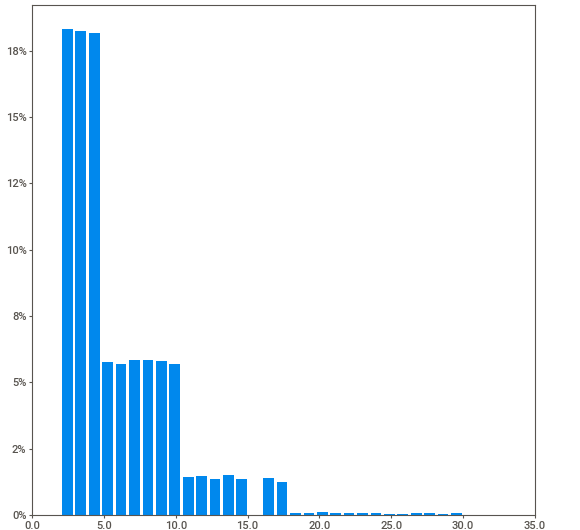
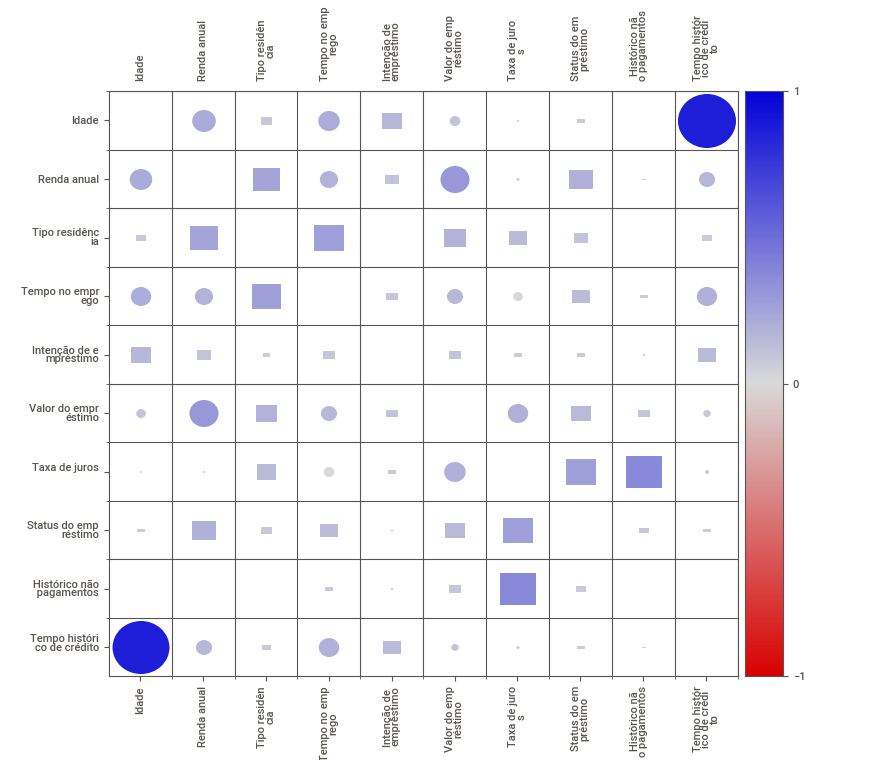
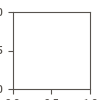

In [11]:
# Visualização dos dados
report = sv.analyze(df)
report.show_notebook()

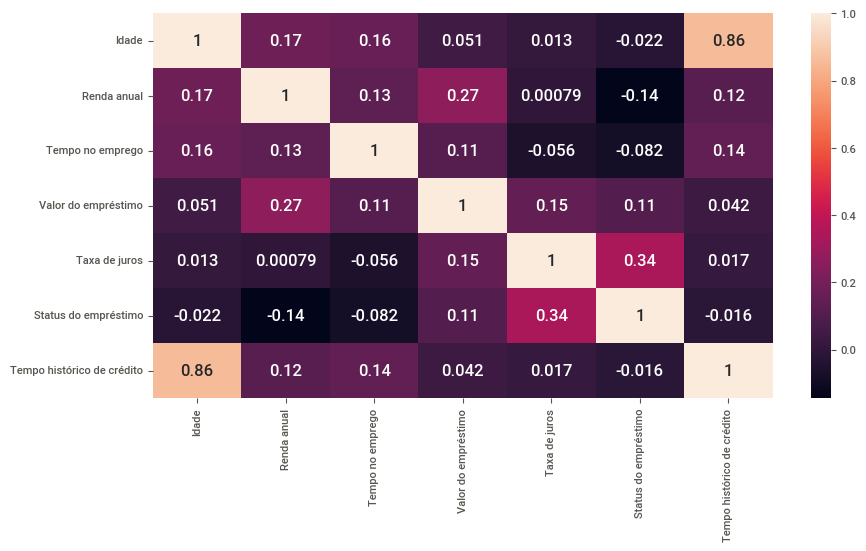

In [12]:
# Matriz de correlação
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Preparação dos Dados

Nessa etapa, será construído o pipeline de preparação dos dados. Algumas transformações são realizadas como preenchimento de dados faltantes Inicialmente, padronização, remoção de outliers e codificação de atributos categóricos serão realizados para que os modelos preditivos possam ser aplicados. Inicialmente, é feita uma divisão da base de dados em estado bruto em conjuntos de treino e teste. Esse conjunto de teste será utilizado posteriormente para simular novos dados com os quais o modelo treinado ainda não teve contato.

In [13]:
# Divisão da base de dados (treino e teste)
X = df.drop('Status do empréstimo', axis=1)
y = df['Status do empréstimo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)
df_train = X_train
X_train.loc[:, 'Status do empréstimo'] = y_train.values
df_test = X_test
X_test.loc[:, 'Status do empréstimo'] = y_test.values
df_train.shape, df_test.shape

((26064, 10), (6517, 10))

In [14]:
# Configuração inicial do PyCaret para classificação
s = setup(data=df_train,
          target='Status do empréstimo',
          imputation_type='simple',
          numeric_imputation='mean',
          categorical_imputation='mode',
          numeric_features=num_features.remove('Status do empréstimo'),
          categorical_features=categ_features,
          max_encoding_ohe=15,
          remove_outliers=True,
          outliers_method='iforest',
          outliers_threshold=0.05,
          normalize=True,
          normalize_method='minmax',
          feature_selection=False,
          #log_experiment=True,
          #experiment_name=EXPERIMENT_NAME,
          #log_plots=True,
          #log_profile=True,
          #log_data=True,
          train_size = 0.80,
          fold_strategy = 'kfold',
          fold = 5,
          data_split_stratify=True,
          n_jobs=-1,
          session_id=SEED)

,Description,Value
0,Session id,42
1,Target,Status do empréstimo
2,Target type,Binary
3,Original data shape,"(26064, 10)"
4,Transformed data shape,"(25021, 18)"
5,Transformed train set shape,"(19808, 18)"
6,Transformed test set shape,"(5213, 18)"
7,Ordinal features,1
8,Numeric features,6
9,Categorical features,3


In [15]:
# Obtendo e salvando o arquivo do conjunto de dados pré-processado
X_train = get_config('X_train')
y_train = get_config('y_train')
X_test = get_config('X_test')
y_test = get_config('y_test')

train = pd.concat([X_train, y_train], axis=1)
valid = pd.concat([X_test, y_test], axis=1)

df_train_proc = pd.concat([train, valid])
df_train_proc.head()
df_train_proc.to_csv('../data/silver/preprocessed.csv', index=False)

# Modelagem

Após a fase de preparação dos dados, 

In [16]:
# Treinamento automático dos modelos de IA
best = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9175,0.9301,0.6813,0.9194,0.7826,0.7330,0.7456,0.2700
rf,Random Forest Classifier,0.9090,0.9102,0.6607,0.8945,0.7599,0.7053,0.7177,0.5860
gbc,Gradient Boosting Classifier,0.9034,0.9099,0.6263,0.9004,0.7387,0.6817,0.6987,0.4400
dt,Decision Tree Classifier,0.8575,0.8068,0.7167,0.6599,0.6870,0.5949,0.5959,0.6120
et,Extra Trees Classifier,0.8766,0.8822,0.5359,0.8416,0.6543,0.5838,0.6061,0.2880
ada,Ada Boost Classifier,0.8496,0.8674,0.4905,0.7316,0.5871,0.4995,0.5145,0.2800
nb,Naive Bayes,0.7356,0.7673,0.6085,0.4261,0.5012,0.3288,0.3384,0.6480
knn,K Neighbors Classifier,0.8141,0.7583,0.3886,0.6172,0.4767,0.3707,0.3855,0.7540
lda,Linear Discriminant Analysis,0.8228,0.8164,0.3334,0.6962,0.4507,0.3605,0.3953,0.1940
lr,Logistic Regression,0.8261,0.8175,0.3257,0.7267,0.4494,0.3637,0.4053,0.8460


In [17]:
# Verificando os hiperparâmetros do melhor modelo
best

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [18]:
# Otimizando os hiperparâmetros com relação à métrica alvo
tuned_model, tuner = tune_model(best, optimize = 'F1', choose_better=True, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9111,0.9308,0.6906,0.8996,0.7814,0.7268,0.7368
1,0.9137,0.9256,0.7069,0.8817,0.7847,0.7315,0.7385
2,0.9173,0.9347,0.6868,0.8773,0.7705,0.7209,0.7289
3,0.9175,0.9331,0.6949,0.9104,0.7882,0.7381,0.7485
4,0.9158,0.9275,0.6945,0.8900,0.7802,0.7291,0.7377
Mean,0.9151,0.9303,0.6948,0.8918,0.7810,0.7293,0.7381
Std,0.0024,0.0034,0.0067,0.0120,0.0059,0.0056,0.0062


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [19]:
# Visualizando o esquema do fluxo do otimizador de hiperparâmetros
tuner

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['Idade',
                                                                          'Renda '
                                                                          'anual',
                                                                          'Tempo '
                                                                          'no '
                                                                          'emprego',
                                                                          'Valor '
                                                                          'do '
                                                                          'empréstimo',
                                                                          'Taxa '
                                                                          'de '
                                                                          'juros',
                                                                          'Tempo '
                                                                          'histórico '
                                                                          'de '
                                                                          'crédito'],
                                                                 transformer=SimpleImputer(...
                                        'actual_estimator__reg_alpha': [1e-07,
                                                                        1e-06,
                                                                        0.0001,
                                                                        0.001,
                                                                        0.01,
                                                                        0.0005,
                                                                        0.005,
                                                                        0.05,
                                                                        0.1,
                                                                        0.15,
                                                                        0.2,
                                                                        0.3,
                                                                        0.4,
                                                                        0.5,
                                                                        0.7, 1,
                                                                        2, 3, 4,
                                                                        5, 10],
                                        'actual_estimator__reg_lambda': [1e-07,
                                                                         1e-06,
                                                                         0.0001,
                                                                         0.001,
                                                                         0.01,
                                                                         0.0005,
                                                                         0.005,
                                                                         0.05,
                                                                         0.1,
                                                                         0.15,
                                                                         0.2,
                                        

In [20]:
# Visualizando os resultados da validação cruzada
model = create_model(tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9130,0.9261,0.6729,0.9295,0.7807,0.7281,0.7429
1,0.9163,0.9253,0.6907,0.9118,0.7860,0.7352,0.7462
2,0.9199,0.9360,0.6690,0.9111,0.7715,0.7244,0.7371
3,0.9221,0.9340,0.6982,0.9319,0.7983,0.7512,0.7632
4,0.9163,0.9292,0.6756,0.9127,0.7764,0.7263,0.7388
Mean,0.9175,0.9301,0.6813,0.9194,0.7826,0.7330,0.7456
Std,0.0032,0.0042,0.0112,0.0093,0.0092,0.0098,0.0094


In [21]:
# Visualizando o esquema do fluxo de preparação e modelagem
final_model = finalize_model(model)
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Idade', 'Renda anual',
                                             'Tempo no emprego',
                                             'Valor do empréstimo',
                                             'Taxa de juros',
                                             'Tempo histórico de crédito'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='de...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=42,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

# Avaliação

Esta é a hora de avaliar se o melhor modelo encontrado anteriormente está realmente gerando bons resultados. A seguir estão as métricas mais comuns para avaliação de modelos de classificação juntamente com algumas visualizações gráficas relevantes.

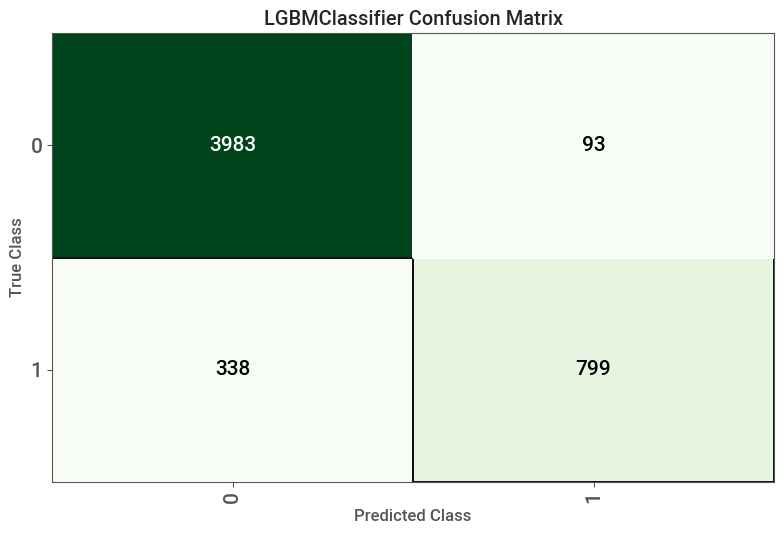

In [22]:
# Matriz de confusão
plot_model(final_model, 'confusion_matrix')

A matriz acima é a chamada "matriz de confusão" e a explicação dela é bem simples e pode ser entendida com a figura abaixo.

<img src="https://miro.medium.com/max/1400/1*j0TSVygS7ZPfK-lZkojNcQ.png" width="900" height="450"/>

Na imagem, existem alguns conceitos que estão explicados de forma intuitiva a seguir:
* **Verdadeiro Positivo (TP):** Casos positivos (empréstimo aprovado) que o modelo previu corretamente como positivos.
* **Falso Negativo (FN):** Casos positivos (empréstimo aprovado) que o modelo previu incorretamente como negativos.
* **Falso Positivo (FP):** Casos negativos (empréstimo negado) que o modelo previu incorretamente como positivos.
* **Verdadeiro Negativo (TN):** Casos negativos (empréstimo negado) que o modelo previu corretamente como negativos.

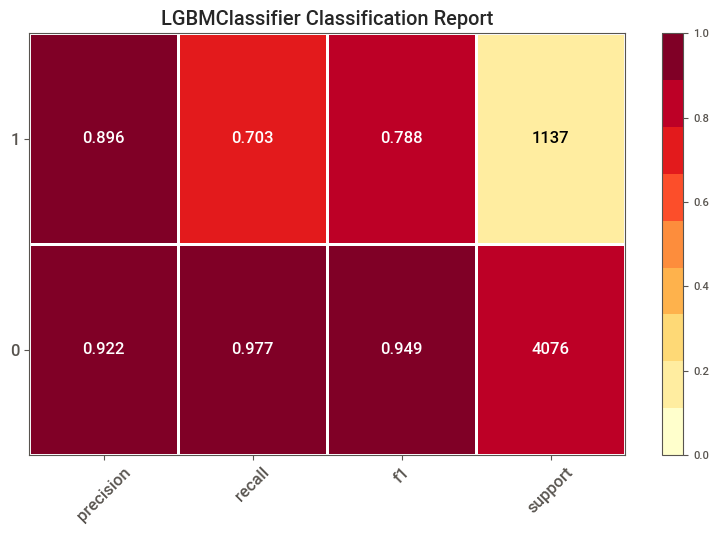

In [23]:
# Métricas de classificação
plot_model(final_model, 'class_report')

Os números acima são as métricas do modelo treinado, isto é, elas mostram como o modelo de ML foi na tarefa de classificar os solicitantes de empréstimo. Essas fórmulas são calculadas a partir da matriz de confusão e as descrições estão a seguir:
* **Acurácia:** Mede a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões, indicando a habilidade geral do modelo em acertar as classes corretas.

$$
Acurácia=\frac{TP+TN}{TP+TN+FN+TP}
$$

* **Precisão:** Avalia a proporção de verdadeiros positivos  em relação ao total de amostras classificadas como positivas, fornecendo uma medida da confiabilidade das previsões positivas do modelo.

$$
Precisão=\frac{TP}{TP+FP}
$$

* **Recall (Sensibilidade):** Representa a proporção de verdadeiros positivos em relação ao total de amostras verdadeiramente positivas, sendo uma medida da capacidade do modelo em identificar corretamente as amostras positivas.

$$
Recall=\frac{TP}{TP+FN}
$$

* **F1 score:** É uma métrica que combina precisão e sensibilidade, fornecendo uma medida única do desempenho geral do modelo, considerando tanto os verdadeiros positivos quanto os falsos positivos e falsos negativos.

$$
F1_{score}=2*\frac{Precisão*Recall}{Precisão+Recall}
$$

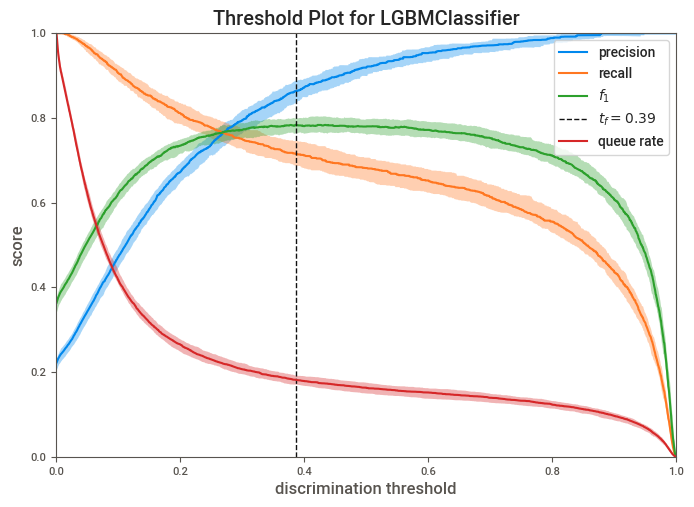

In [24]:
# Curva do limiar de classificação (threshold)
plot_model(final_model, 'threshold')

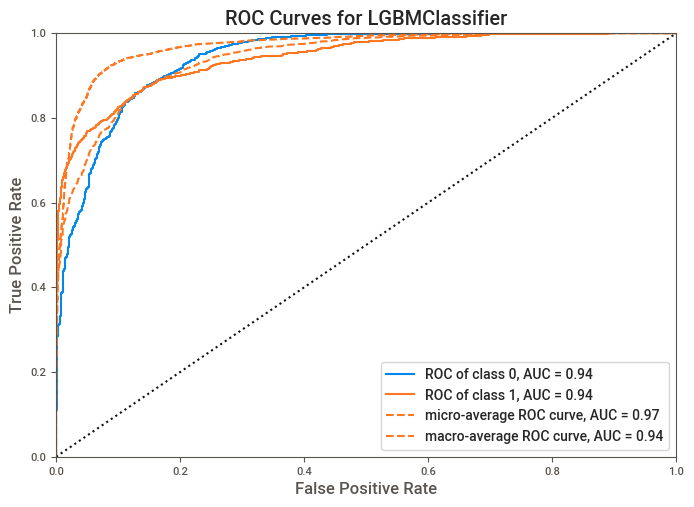

In [25]:
# Curva ROC
plot_model(final_model, 'auc')

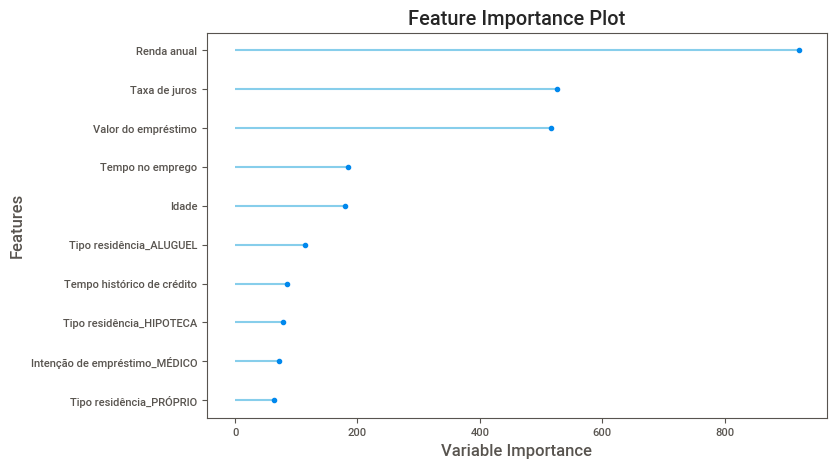

In [26]:
# Importância dos atributos
plot_model(final_model, 'feature')

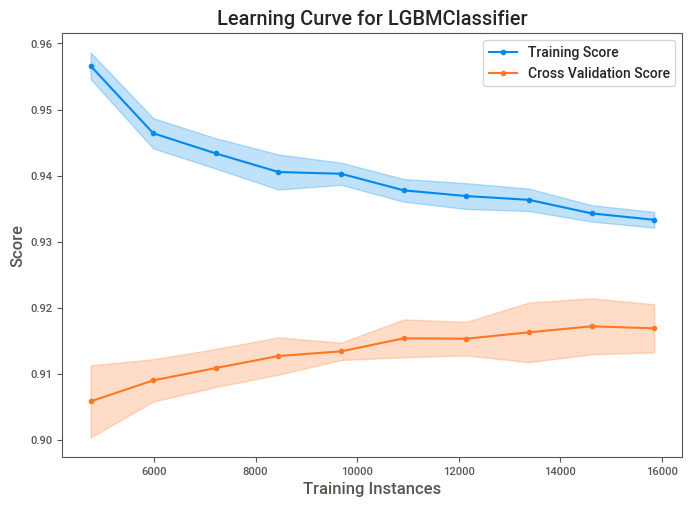

In [27]:
# Curva treino X validação (análise de overfitting/underfitting)
plot_model(final_model, 'learning')

In [28]:
# Download do modelo treinado
save_model(final_model, f'../pipelines/{EXPERIMENT_NAME}_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Idade', 'Renda anual',
                                              'Tempo no emprego',
                                              'Valor do empréstimo',
                                              'Taxa de juros',
                                              'Tempo histórico de crédito'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                  

# Previsões na base de teste

Agora, para finalizar, serão realizadas algumas previsões na base de teste, ou seja, serão obtidos os dados que o modelo construído ainda não teve contato e observar o desempenho dele. Em outras palavras, será simulada uma situação em que um usuário acabou de receber uma tabela de clientes e precisa decidir para quais pessoas o empréstimo irá ser liberado e para quais não será.

In [29]:
# Tabela de novos clientes
new_clients = df_test.iloc[:10, :]
new_clients.head(10)

,Idade,Renda anual,Tipo residência,Tempo no emprego,Intenção de empréstimo,Valor do empréstimo,Taxa de juros,Histórico não pagamentos,Tempo histórico de crédito,Status do empréstimo
720,22,100531.20,HIPOTECA,3.0,PAGAMENTO DE DIVIDAS,7735.0,16.89,S,3,1
12844,24,404600.00,HIPOTECA,2.0,PESSOAL,38080.0,NaN,N,4,0
23462,35,157765.44,ALUGUEL,3.0,INVESTIMENTO,39984.0,14.91,N,8,0
32313,62,325465.00,ALUGUEL,4.0,MÉDICO,115430.0,12.73,N,28,1
27357,28,585480.00,HIPOTECA,0.0,PESSOAL,47600.0,7.14,N,6,1
2199,23,138040.00,ALUGUEL,1.0,INVESTIMENTO,64141.0,14.26,S,4,1
26883,33,552160.00,HIPOTECA,5.0,EDUCAÇÃO,71400.0,12.84,N,7,0
14513,23,516936.00,HIPOTECA,3.0,MÉDICO,38080.0,12.87,S,2,0
28284,28,228480.00,ALUGUEL,5.0,PAGAMENTO DE DIVIDAS,71400.0,11.99,N,10,1
1789,23,104739.04,ALUGUEL,8.0,EDUCAÇÃO,9520.0,10.39,N,3,0


In [30]:
# Carregando o pipeline já salvo
model = load_model(f'../pipelines/{EXPERIMENT_NAME}_pipeline')

Transformation Pipeline and Model Successfully Loaded


In [31]:
# Previsões de teste do modelo
predictions = predict_model(model, data=new_clients)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8000,0.8000,0.8000,0.8000,0.8000,0.6000,0.6000


,Idade,Renda anual,Tipo residência,Tempo no emprego,Intenção de empréstimo,Valor do empréstimo,Taxa de juros,Histórico não pagamentos,Tempo histórico de crédito,Status do empréstimo,prediction_label,prediction_score
720,22,100531.203125,HIPOTECA,3.0,PAGAMENTO DE DIVIDAS,7735.0,16.889999,S,3,1,1,0.9647
12844,24,404600.000000,HIPOTECA,2.0,PESSOAL,38080.0,NaN,N,4,0,0,0.9626
23462,35,157765.437500,ALUGUEL,3.0,INVESTIMENTO,39984.0,14.910000,N,8,0,1,0.5107
32313,62,325465.000000,ALUGUEL,4.0,MÉDICO,115430.0,12.730000,N,28,1,1,0.7223
27357,28,585480.000000,HIPOTECA,0.0,PESSOAL,47600.0,7.140000,N,6,1,0,0.9840
2199,23,138040.000000,ALUGUEL,1.0,INVESTIMENTO,64141.0,14.260000,S,4,1,1,0.9705
26883,33,552160.000000,HIPOTECA,5.0,EDUCAÇÃO,71400.0,12.840000,N,7,0,0,0.9580
14513,23,516936.000000,HIPOTECA,3.0,MÉDICO,38080.0,12.870000,S,2,0,0,0.9261
28284,28,228480.000000,ALUGUEL,5.0,PAGAMENTO DE DIVIDAS,71400.0,11.990000,N,10,1,1,0.8607
1789,23,104739.039062,ALUGUEL,8.0,EDUCAÇÃO,9520.0,10.390000,N,3,0,0,0.9116


# Desenvolvimento

A aplicação desenvolvida a partir dos processamentos e treinamentos realizados neste Jupyter Notebook pode ser acessada através do link.

# Referências

https://pycaret.gitbook.io/docs/

https://towardsdatascience.com/easy-mlops-with-pycaret-mlflow-7fbcbf1e38c6

https://towardsdatascience.com/deploy-machine-learning-app-built-using-streamlit-and-pycaret-on-google-kubernetes-engine-fd7e393d99cb

https://www.restack.io/docs/mlflow-knowledge-mlflow-pycaret-integration

https://github.com/pycaret/pycaret-streamlit-google

https://www.restack.io/docs/mlflow-knowledge-mlflow-on-gcp-integration

https://moez-62905.medium.com/simplify-mlops-with-pycaret-mlflow-and-dagshub-366c768f0dac